1. Authenticate to Twitter

In [1]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [2]:
consumer_key = 'UcerJrvbvJ4cCu0js2bIJGa72'
consumer_secret = '26LtLRkWgaC4fufaCiX72oRVszwKY0PGjQLlTEysYfoOfb1Snb'
access_token = '288837693-fDCoDYmfvbbIwTQKXPmIoM8U8Z3nOxm0YV9TdYxt'
access_token_secret = 'HbmyQhpWDq0NgNIasvV0xTlj5pLfi6I7A1YVKDVonKsqa'

In [3]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

2. Get Tweets

In [4]:
hashtag = "#ITASWI"
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': "RT @PMU_Sport: 🇪🇺 Très solide contre la Turquie, l'Italie dispute son second match de groupe face à la Suisse 💥💥💥 #ITASWI\n\n⚽ Combien de but…", 'Timestamp': datetime.datetime(2021, 6, 16, 13, 53, 48)}, {'Tweet': "RT @PMU_Sport: 🇪🇺 Très solide contre la Turquie, l'Italie dispute son second match de groupe face à la Suisse 💥💥💥 #ITASWI\n\n⚽ Combien de but…", 'Timestamp': datetime.datetime(2021, 6, 16, 13, 52, 47)}, {'Tweet': "RT @PMU_Sport: 🇪🇺 Très solide contre la Turquie, l'Italie dispute son second match de groupe face à la Suisse 💥💥💥 #ITASWI\n\n⚽ Combien de but…", 'Timestamp': datetime.datetime(2021, 6, 16, 13, 52, 40)}, {'Tweet': "RT @PMU_Sport: 🇪🇺 Très solide contre la Turquie, l'Italie dispute son second match de groupe face à la Suisse 💥💥💥 #ITASWI\n\n⚽ Combien de but…", 'Timestamp': datetime.datetime(2021, 6, 16, 13, 52, 30)}, {'Tweet': "RT @PMU_Sport: 🇪🇺 Très solide contre la Turquie, l'Italie dispute son second match de groupe face à la Suisse 💥💥💥 #ITASWI\n\n⚽ Combi

In [5]:
tweets[0]

{'Tweet': "RT @PMU_Sport: 🇪🇺 Très solide contre la Turquie, l'Italie dispute son second match de groupe face à la Suisse 💥💥💥 #ITASWI\n\n⚽ Combien de but…",
 'Timestamp': datetime.datetime(2021, 6, 16, 13, 53, 48)}

In [6]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:53:48
1,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:52:47
2,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:52:40
3,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:52:30
4,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:50:16


In [7]:
Italy_handle = ['Italy', 'italy', 'Forza', 'Azzuri','Italia', 'Italy\'s']
Switzerland_handle = ['Switzerland', 'Swiss', 'Nati ', 'Rossocrociati ', 'Switzerland\'s']

In [8]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['Italy'] = df['Tweet'].apply(lambda x: identify_subject(x, Italy_handle)) 
df['Switzerland'] = df['Tweet'].apply(lambda x: identify_subject(x, Switzerland_handle))
df.head(10)

,Tweet,Timestamp,Italy,Switzerland
0,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:53:48,0,0
1,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:52:47,0,0
2,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:52:40,0,0
3,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:52:30,0,0
4,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:50:16,0,0
5,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:50:03,0,0
6,👟 Who will win the Golden Boot at Euro 2020? ⚽...,2021-06-16 13:50:03,0,0
7,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:49:55,0,0
8,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:49:47,0,0
9,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:49:47,0,0


In [9]:
df[df["Italy"] == 1]

,Tweet,Timestamp,Italy,Switzerland
38,#EURO2020 #ITASWI \n\n👀for the Best Odds on #E...,2021-06-16 13:24:42,1,0
214,#Euro2020 \n#ItaSwi in a dream I saw an Italia...,2021-06-16 12:31:26,1,0
238,⚽ Italy vs Switzerland Betting Preview 🏆\n\n✅ ...,2021-06-16 12:25:02,1,1
246,⚽ Italy vs Switzerland Betting Tips 🏆\n\n✅ Pre...,2021-06-16 11:28:43,1,1
253,Wednesday Euros acca: ⚽️🤑\n\n Turkey\n Russi...,2021-06-16 11:10:38,1,0
255,"More predictions, let's see how these go\nFinl...",2021-06-16 11:08:12,1,1
259,RT @BarnsleyMuseums: #Euro2020 fixtures as Bar...,2021-06-16 11:01:41,1,1
262,#Euro2020 fixtures as Barnsley Museums objects...,2021-06-16 11:00:01,1,1
263,- 1/1\n- 10/1\n- 10/1\n\n@Scottythorn19 is the...,2021-06-16 11:00:00,1,1
264,🏆 #Pronostici Italia - Svizzera ⚽\n\n✅ #Scomme...,2021-06-16 10:56:06,1,0


In [10]:
df[df["Switzerland"] == 1]

,Tweet,Timestamp,Italy,Switzerland
238,⚽ Italy vs Switzerland Betting Preview 🏆\n\n✅ ...,2021-06-16 12:25:02,1,1
246,⚽ Italy vs Switzerland Betting Tips 🏆\n\n✅ Pre...,2021-06-16 11:28:43,1,1
248,#EURO2020 #nati_sfv_asf #ITASWI Rein aus Inter...,2021-06-16 11:25:53,0,1
255,"More predictions, let's see how these go\nFinl...",2021-06-16 11:08:12,1,1
259,RT @BarnsleyMuseums: #Euro2020 fixtures as Bar...,2021-06-16 11:01:41,1,1
262,#Euro2020 fixtures as Barnsley Museums objects...,2021-06-16 11:00:01,1,1
263,- 1/1\n- 10/1\n- 10/1\n\n@Scottythorn19 is the...,2021-06-16 11:00:00,1,1
279,🇪🇺UEFA European Championship -- Italy vs Switz...,2021-06-16 09:45:41,1,1
280,⚽️ UEFA EURO 2020 - Group A - 🇮🇹 Italy vs Swi...,2021-06-16 09:37:01,1,1
282,RT @ESport_Bet: #Euro2020:\n#Finland 6.4 / X 3...,2021-06-16 09:20:39,1,1


3. Preprocess

In [11]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [12]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#ITASWI']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vivekkannajayaprakash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vivekkannajayaprakash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Italy,Switzerland,Processed Tweet
0,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:53:48,0,0,"@PMU_Sport: 🇪🇺 Très solide contre la Turquie, ..."
1,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:52:47,0,0,"@PMU_Sport: 🇪🇺 Très solide contre la Turquie, ..."
2,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:52:40,0,0,"@PMU_Sport: 🇪🇺 Très solide contre la Turquie, ..."
3,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:52:30,0,0,"@PMU_Sport: 🇪🇺 Très solide contre la Turquie, ..."
4,RT @PMU_Sport: 🇪🇺 Très solide contre la Turqui...,2021-06-16 13:50:16,0,0,"@PMU_Sport: 🇪🇺 Très solide contre la Turquie, ..."


In [14]:
print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])

Base review
 RT @PMU_Sport: 🇪🇺 Très solide contre la Turquie, l'Italie dispute son second match de groupe face à la Suisse 💥💥💥 #ITASWI

⚽ Combien de but…

------------------------------------

Cleaned and lemmatized review
 @PMU_Sport: 🇪🇺 Très solide contre la Turquie, l'Italie dispute son second match de groupe face à la Suisse 💥💥💥 ⚽ Combien de but…


In [15]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'Italy', 'Switzerland', 'polarity', 'subjectivity']].head()

,Processed Tweet,Italy,Switzerland,polarity,subjectivity
0,"@PMU_Sport: 🇪🇺 Très solide contre la Turquie, ...",0,0,0.0,0.0
1,"@PMU_Sport: 🇪🇺 Très solide contre la Turquie, ...",0,0,0.0,0.0
2,"@PMU_Sport: 🇪🇺 Très solide contre la Turquie, ...",0,0,0.0,0.0
3,"@PMU_Sport: 🇪🇺 Très solide contre la Turquie, ...",0,0,0.0,0.0
4,"@PMU_Sport: 🇪🇺 Très solide contre la Turquie, ...",0,0,0.0,0.0


In [16]:
display(df[df['Italy']==1][['Italy','polarity','subjectivity']].groupby('Italy').agg([np.mean, np.max, np.min, np.median]))
df[df['Switzerland']==1][['Switzerland','polarity','subjectivity']].groupby('Switzerland').agg([np.mean, np.max, np.min, np.median])

polarity                     subjectivity                 
           mean amax amin    median         mean amax amin median
Italy                                                            
1      0.307842  1.0  0.0  0.142857     0.254037  0.9  0.0   0.25

polarity                  subjectivity                 
                 mean amax amin median         mean amax amin median
Switzerland                                                         
1            0.296875  0.8  0.0    0.2     0.289062  0.9  0.0    0.2

In [18]:
Switzerland = df[df['Switzerland']==1][['Timestamp', 'polarity']]
Switzerland = Switzerland.sort_values(by='Timestamp', ascending=True)
Switzerland['MA Polarity'] = Switzerland.polarity.rolling(10, min_periods=3).mean()

Italy = df[df['Italy']==1][['Timestamp', 'polarity']]
Italy = Italy.sort_values(by='Timestamp', ascending=True)
Italy['MA Polarity'] = Italy.polarity.rolling(10, min_periods=3).mean()

In [19]:
Italy.head()

,Timestamp,polarity,MA Polarity
320,2021-06-13 18:05:04,0.0000,NaN
318,2021-06-14 19:05:09,0.1875,NaN
314,2021-06-15 09:45:06,0.0000,0.062500
304,2021-06-15 22:59:30,0.4500,0.159375
303,2021-06-15 23:40:58,0.8000,0.287500


In [20]:
Switzerland.head()

,Timestamp,polarity,MA Polarity
313,2021-06-15 11:03:35,0.00,NaN
304,2021-06-15 22:59:30,0.45,NaN
303,2021-06-15 23:40:58,0.80,0.416667
294,2021-06-16 07:10:02,0.70,0.487500
286,2021-06-16 08:58:43,0.50,0.490000


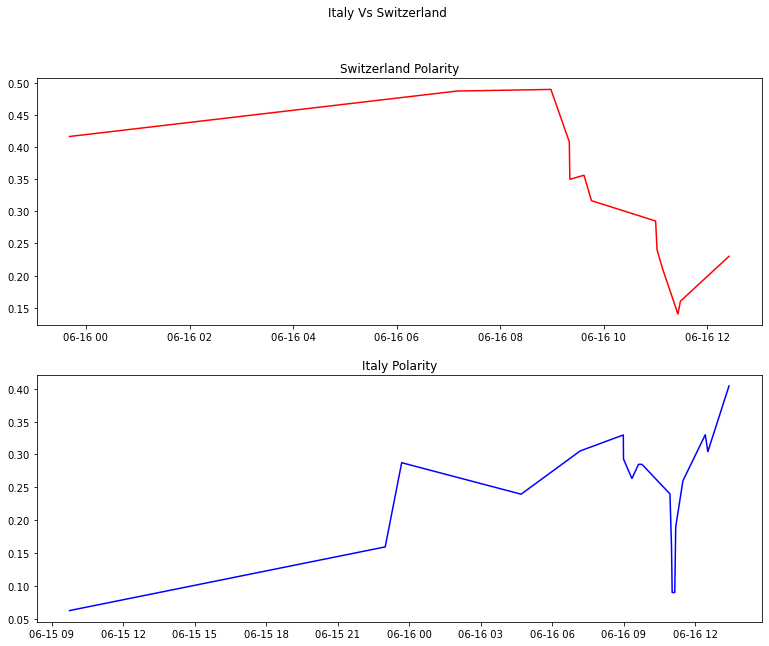

In [21]:
ITA = 'blue'
SWI = 'red'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(Switzerland['Timestamp'], Switzerland['MA Polarity'] , color = 'red')
axes[0].set_title("\n".join(["Switzerland Polarity"]))

axes[1].plot(Italy['Timestamp'], Italy['MA Polarity'], color='blue')
axes[1].set_title("\n".join(["Italy Polarity"]))

fig.suptitle("\n".join(["Italy Vs Switzerland"]), y=0.98)

plt.show()